# 0. Installation

## 0.1. Install Anancoda
To install the Anaconda distribution, just go to the Anaconda download page <i>https://www.anaconda.com/distribution/</i> and pick the appropriate installer. Then, run the downloaded installer file.

## 0.2. Install needed Python packages
<br>1. Open Anaconda Prompt with option: Run as administrator
<br>2. Type: pip install package_name and press Enter. For example, to install package graphviz you type: pip install graphviz at command prompt and press Enter

In [1]:
#packages for manipulating data
import pandas as pd
import numpy as np

# #packages for visualizing data
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# import graphviz
# import pydotplus
# import io
# from scipy import misc

#package for connecting to SQL Server
import pyodbc

#setting up environment
%matplotlib inline
pd.set_option('display.max_columns',500 )
import warnings
warnings.filterwarnings('ignore')   #turn off warning

# 1. Read data from csv file and display subset of rows

In [2]:
df = pd.read_csv(r'C:\users\vdavis\vTargetMail_ICA04a.csv', encoding='utf-8') 
df.head(8)

,CustomerKey,GeographyKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,Suffix,Gender,EmailAddress,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,Age,BikeBuyer
0,22576,11,NaN,Tony,L,Xu,0,1980-12-24,S,NaN,M,tony8@adventure-works.com,20000.0,0,0,Bachelors,Clerical,0,0,8489 Barbie Dr.,NaN,1 (11) 500 555-0154,2006-11-02,0-1 Miles,Pacific,36,1
1,22577,13,NaN,Bryant,S,Sai,0,1980-06-02,M,NaN,M,bryant6@adventure-works.com,20000.0,0,0,Bachelors,Clerical,1,0,8500 Byers Rd.,NaN,1 (11) 500 555-0180,2006-11-30,0-1 Miles,Pacific,37,1
2,22578,37,NaN,Juan,P,Vazquez,0,1977-10-12,S,NaN,M,juan3@adventure-works.com,10000.0,0,0,High School,Manual,0,2,2736 Scottsdale Rd,NaN,1 (11) 500 555-0182,2006-11-10,0-1 Miles,Pacific,39,1
3,22579,13,NaN,Kara,NaN,Lal,0,1976-04-17,S,NaN,F,kara9@adventure-works.com,10000.0,1,1,High School,Manual,0,0,7340 Pine Creek Way,NaN,1 (11) 500 555-0174,2006-11-17,1-2 Miles,Pacific,41,1
4,22580,23,NaN,Alexis,NaN,Long,0,1979-04-07,S,NaN,F,alexis32@adventure-works.com,10000.0,1,1,High School,Manual,0,0,3376 Jacaranda Dr.,NaN,1 (11) 500 555-0174,2006-11-03,1-2 Miles,Pacific,38,1
5,22581,19,NaN,Theresa,F,Vazquez,0,1979-08-20,M,NaN,F,theresa10@adventure-works.com,20000.0,0,0,Bachelors,Clerical,0,0,5227 Sutton Circle,NaN,1 (11) 500 555-0116,2006-11-11,0-1 Miles,Pacific,38,1
6,22582,27,NaN,Evelyn,D,Madan,0,1979-11-17,S,NaN,F,evelyn8@adventure-works.com,20000.0,0,0,Bachelors,Clerical,0,0,8162 Zacatecas,NaN,1 (11) 500 555-0137,2006-11-07,0-1 Miles,Pacific,37,1
7,22583,25,NaN,Troy,R,Sara,0,1977-08-12,S,NaN,M,troy11@adventure-works.com,20000.0,0,0,Partial College,Manual,1,0,1002 N. Spoonwood Court,NaN,1 (11) 500 555-0139,2006-11-16,1-2 Miles,Pacific,40,1


# 5. Visualize data

## 5.1. Histogram plots

A histogram is an accurate representation of the distribution of numerical data by depicting the frequencies of observations occurring in certain ranges of values. <i>https://en.wikipedia.org/wiki/Histogram</i>

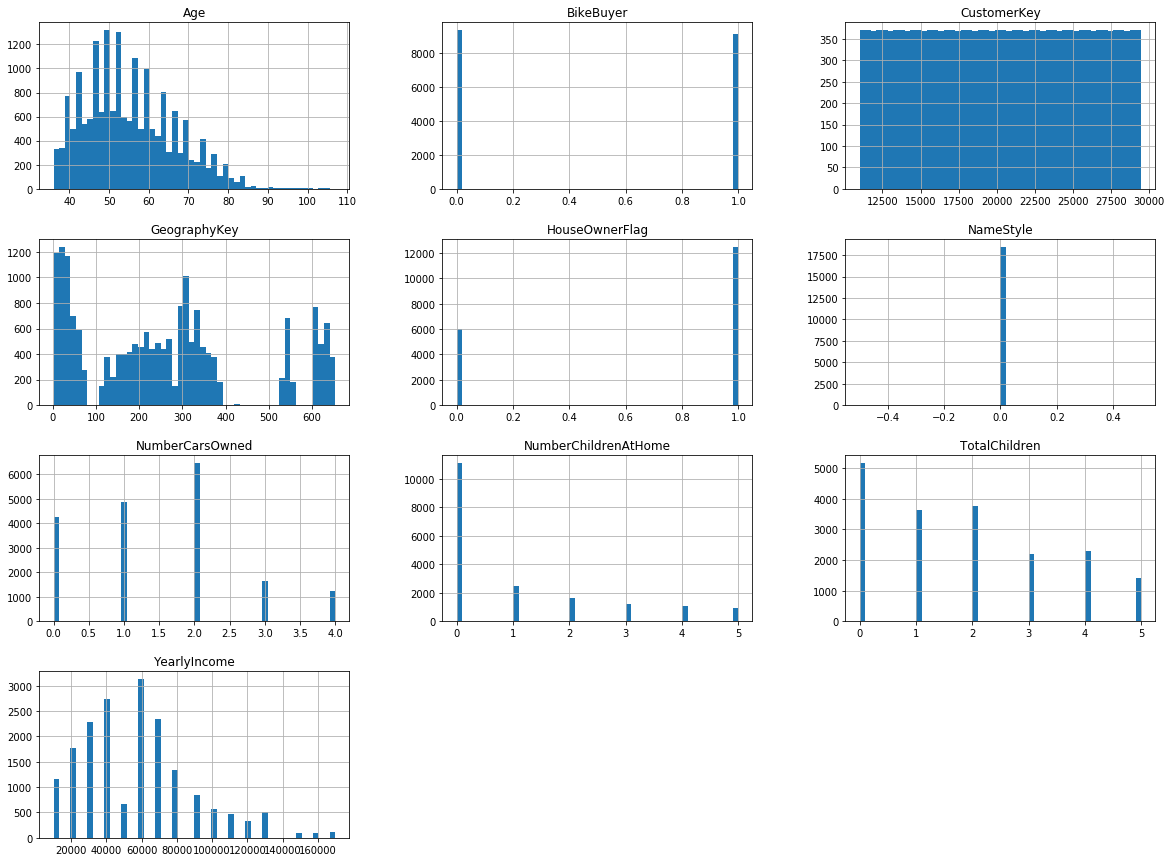

In [3]:
%matplotlib inline  

df.hist(bins=50, figsize=(20,15))
plt.show()

## Box plot

In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles. The spacings between the different parts of the box indicate the degree of dispersion (spread) and skewness in the data, and show outliers. <i>(https://en.wikipedia.org/wiki/Box_plot)</i>

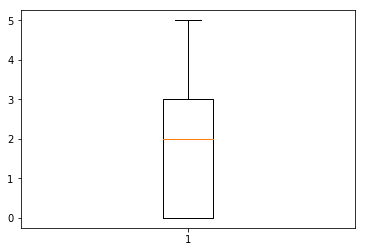

In [4]:
plt.boxplot(df['TotalChildren'])
plt.show()

In [5]:
pd.isnull(df).any()

CustomerKey             False
GeographyKey            False
Title                    True
FirstName               False
MiddleName               True
LastName                False
NameStyle               False
BirthDate               False
MaritalStatus           False
Suffix                   True
Gender                  False
EmailAddress            False
YearlyIncome            False
TotalChildren           False
NumberChildrenAtHome    False
EnglishEducation        False
EnglishOccupation       False
HouseOwnerFlag          False
NumberCarsOwned         False
AddressLine1            False
AddressLine2             True
Phone                   False
DateFirstPurchase       False
CommuteDistance         False
Region                  False
Age                     False
BikeBuyer               False
dtype: bool

# 6. Data Pivot Tables

## Pivot table

A pivot table is a table of statistics that summarizes the data of a more extensive table (such as from a database, spreadsheet, or business intelligence program). This summary might include sums, averages, or other statistics, which the pivot table groups together in a meaningful way.
<br>
<br>Pivot tables are a technique in data processing. They enable a person to arrange and rearrange (or "pivot") statistics in order to draw attention to useful information. <i>https://en.wikipedia.org/wiki/Pivot_table</i>
<br>
<br>Pandas can be used to create MS Excel style pivot tables. For instance, in this case, a key column is “YearlyIncome” using mean amount of each ‘Gender’, ‘MaritalStatus’ and ‘BikeBuyer’ group.

In [6]:
yearlyIncome = df.pivot_table(values=["YearlyIncome"], index=["Gender","MaritalStatus","BikeBuyer"], aggfunc=np.mean)
print(yearlyIncome)

                                YearlyIncome
Gender MaritalStatus BikeBuyer              
F      M             0          60317.269076
                     1          60616.407982
       S             0          50562.072336
                     1          57058.070026
M      M             0          59547.038328
                     1          61243.739566
       S             0          50560.123330
                     1          55750.350631


## Crosstab

Crosstab reports, also known as matrix reports show the relationships between three or more query items. Crosstab reports show data in rows and columns with information summarized at the intersection points.

In [8]:
pd.crosstab(df["EnglishEducation"], df["EnglishOccupation"],df["YearlyIncome"],margins=True, aggfunc=np.mean)

EnglishOccupation,Clerical,Management,Manual,Professional,Skilled Manual,All
EnglishEducation,,,,,,
Bachelors,27679.640719,88650.843223,11084.337349,68257.415254,49005.376344,64395.070948
Graduate Degree,31578.947368,90141.911069,11311.475410,66220.930233,57562.913907,66095.954845
High School,30000.000000,108013.029316,18398.656215,71956.967213,37924.710425,49049.787492
Partial College,34525.896414,121318.681319,16189.839572,82867.469880,57671.755725,55211.295419
Partial High School,24068.522484,131052.631579,15141.903172,116838.235294,65861.111111,39468.690702
All,30710.382514,92325.203252,16451.342282,74184.782609,51715.097225,57305.777970
